# Introduction

Support vector machine (SVM) is a supervised learning algorithm that can be used to predict the label of future values, identify outliers, or generate regression models. For this implementation, we'll focus on SVM's classification application (SVC). 

Using SVC, you can transform overlapping categories into a 3-dimensional space that can be separated by hyperplane(s). SVC accuracy can be improved by the type of model used (linear, polynomial, etc.), slack variables, and the error penalty parameter (C). The higher the error penalty value, the more sensitive it is to the training data.


## Assumptions

SVM assumes that the probability distribution of the features are the same and that the features are mutually independent. The occurrence of one feature cannot impact the performance of another feature. There are multiple types of SVMs:

* classification: for predicting a nominal (categorical) label

* regression: for predicting continous variables

* outlier detection


## Non-Code Example

Imagine we have two medical diagnoses: benign (non-cancerous) tumors and malignant (cancerous) tumors. Given the radius and concavity measurements for the 8 tumors below, what hyperplane can be used to distinguish the benign and malignant diagnoses?

| Radius  | Concavity   | Diagnosis  |
| ------- |-------------| :-----:|
| 4       | 1           | Benign     |
| 3       | -1          | Benign     |
| 6       |1            | Benign     |
| 6       |-1           | Benign     |
| 1       |1            | Malignant     |
| 0       |1            | Malignant     |
| 0       |-1           | Malignant     |
| -1      |0            | Malignant     |


If we were plot these by hand, we would get the following plot:

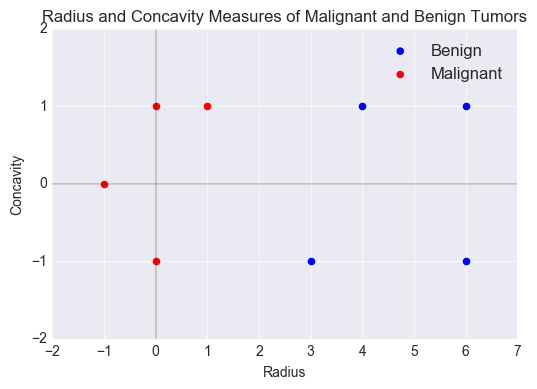

In [126]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

benign = plt.scatter([4,3,6,6], [1,-1,1,-1], color='blue')
malignant = plt.scatter([1,0,0,-1], [1,1,-1,0], color='red')

# Add styling and axes
style.use('seaborn-darkgrid')
style.context(('dark_background'))
plt.yticks(np.arange(-2, 3, 1.0))
plt.axhline(y=0, lw=0.25, color='black')
plt.axvline(x=0, lw=0.25, color='black')

# Add labels
plt.title('Radius and Concavity Measures of Malignant and Benign Tumors')
plt.legend([benign, malignant], ["Benign", "Malignant"])
plt.ylabel('Concavity')
plt.xlabel('Radius')

plt.show()

From the plot, we notice that a linear hyperplane can be used to separate the benign and malignant tumors, with benign on the left and malignant on the right:

Benign = [ (3,-1), (4,1) ]

Malignant = [ (0,-1), (1,1) ]

### Choosing the hyperplane

In this simple case, we can seperate the points by defining the hyperplane separator as $w^Tx+b=0$ and the gutters as $w^Tx+b=-1$ and $w^Tx+b=1$. This makes our penalty parameter ($c$) as 1.

To clearly separate the data using a hyperplane, we'll put the malignant and benign on a 3-dimensional space with planes to separate the boundaries. $\overrightarrow{w}$ is the weight vector, $\overrightarrow{x}$ the input vector, and $b$ the bias:

Tip of malignant: $ \overrightarrow{w} \cdot \overrightarrow{x} + b = 1$

Tip of benign: $ \overrightarrow{w} \cdot \overrightarrow{x} + b = -1$

Hyperplane separator: $ \overrightarrow{w} \cdot \overrightarrow{x} + b = 0$

Now we can plugin our boundary values of:
    
Benign = [ (3,-1), (4,1) ]

Malignant = [ (0,-1), (1,1) ]

To solve for each of the weights:

$Benign_1 = -1_{w1} + 3_{w2} + w3 = 1$

$Benign_2 = 1_{w1} + 4_{w2} + w3 = 1$

$Malignant_1 = -1_{w1} + 0_{w2} + w3 = -1$

$Malignant_2 = 1_{w1} + 1_{w2} + w3 = -1$

We can solve for $w1$ by subtracting $Benign_1 - Malignant_2$:

$(1 + 1_{w1} - 3_{w2}) - (-1 - 1_{w1} - 1_{w2}) = -2_{w2} + 2{w1} + 2$

$w1 = -1 + 1_{w2}$

Next we'll substitute w1 in $Benign_2$ (the original equation) to solve for $w3$.

$w3 = 2 - 5_{w2}$

Now we can solve for $w2$ by plugging in the values to $Malignant_1$.

$w2 = \frac{2}{3}$

Our final weights are:

$w1 = -\frac{1}{3}$

$w2 = \frac{2}{3}$

$w3 = -\frac{4}{3}$

Our hyperplane separator is therefore:

$-\frac{1}{3}x+\frac{2}{3}y-\frac{4}{3} = 0$

If we try to solve this computationally, we see that we get approximately the same weights and intercept:


[-0.66681609  0.33363218]
1.33363218391


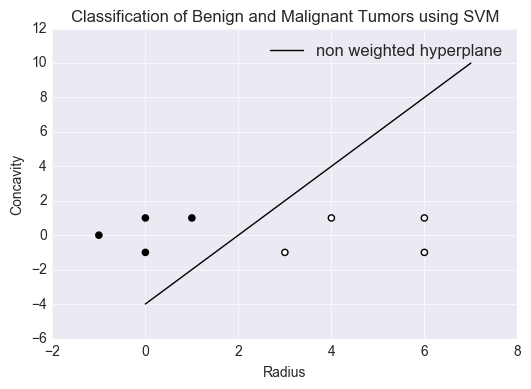

In [127]:
from sklearn import svm

X = np.array([[4,1],
            [3,-1],
            [6,1],
            [6,-1],
            [1,1],
            [0,1],
            [0,-1],
            [-1,0]])
y = [0,0,0,0,1,1,1,1]

# Find seperating hyperplane
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X,y)

w = model.coef_[0]
print(w)
print(model.intercept_[0])

# Graph the hyperplane
a = -w[0] / w[1]
xx = np.linspace(0,7)
yy = a * xx - model.intercept_[0] / w[1]
h0 = plt.plot(xx, yy, 'k-', label="non weighted hyperplane")

# Graph the points
plt.scatter(X[:, 0], X[:, 1], c = y)

# Add labels
plt.title('Classification of Benign and Malignant Tumors using SVM')
plt.ylabel('Concavity')
plt.xlabel('Radius')
plt.legend()
plt.show()

# Detecting Breast Cancer Diagnoses using SVM and Python

Now let's use a (larger) publically available dataset from the University of California Irvine ($n=699$) to detect breast cancer diagnoses based on multiple features ($n=9$) rather than just tumor radius and concavity. We'll exclude the sample code and class in our X matrix. 

This setup requires Python 3.

The 699 cases, include the following features:

 1. Sample code number (id number)
 2. Clump Thickness
 3. Uniformity of Cell Size 
 4. Uniformity of Cell Shape 
 5. Marginal Adhesion 
 6. Single Epithelial Cell Size
 7. Bare Nuclei  
 8. Bland Chromatin              
 9. Normal Nucleoli               
 10. Mitoses                       
 11. Class: 2 for benign (total benign=458), 4 for malignant (total malignant=241)
  
Features 2-10 contain values ranging from 1-10.

In [128]:
import pandas
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thick', 'cell_size', 'cell_shape', 'margin_adh', 'single_size', 'bare_nuclei', 'chromatin', 'norm_nuclei', 'mitosis', 'class']
data = pandas.read_csv(url, names=names)
print(data.shape)

X = data.ix[0:, 1:10]
y = data.ix[0:, -1]

(699, 11)


## Building a Model using SVM

First we'll split the data to include testing and training datasets. Using the training data we'll train the model to build future predictions on.


In [129]:
# replace question mark values in data
X.replace(to_replace='?', value=0, inplace=True)

# split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# generate the SVC model
model_orig = SVC(kernel='linear', C=1.0)
model_orig.fit(X_train, y_train)

w = model_orig.coef_[0]
print(w)
print(model_orig.intercept_[0])

[ 0.5735644  -0.15594009  0.1247745   0.47099306  0.18589666  0.27329992
  0.45734291  0.13639168  0.70103449]
-8.99078674858


## Testing for Accuracy using a Confusion Matrix

Now we can use the X_test to test the accuracy of the SVC model.

In [130]:
pred = model_orig.predict(X_test)
c_matrix = confusion_matrix(y_test, pred)

print(c_matrix)

[[129   6]
 [  4  71]]


Based on the results, we see that there are only 10 out of 210 instances when the model mispredicted the results. To futher improve the accuracy we can test a variety of C and gamma parameters:

In [131]:
param = {'kernel': ('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma':[0.01,0.02,0.03,0.04,0.05]}
model_alt = svm.SVC()
grid = GridSearchCV(model_alt, param)
grid.fit(X_train, y_train)
pred_alt = grid.predict(X_test)
print(grid.best_params_)

c_matrix = confusion_matrix(y_test, pred_alt)
print(c_matrix)

{'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
[[127   8]
 [  3  72]]


Using the grid search method, we found 11 out of 210 mispredicted results. A radial basis function was used instead of the linear function, in order to improve the number of true positives from 71 to 72. Based on these results however, the original model is more appropriate:

Original Linear Model:
* Accuracy: 0.95

* Misclassification rate: 0.05

* Recall: 0.94

* Precision: 0.98

* F1-measure: 0.48
